# Using Sentinel 2 data with Julia

Sentinel2 data downloaded from copernicus scihub

In [3]:
using ArchGDAL; const AG = ArchGDAL

TCI = "D:/data/S2B_MSIL2A_20211122T111259_N0301_R137_T30UXB_20211122T131130/S2B_MSIL2A_20211122T111259_N0301_R137_T30UXB_20211122T131130.SAFE/GRANULE/L2A_T30UXB_A024616_20211122T111443/IMG_DATA/R10m/T30UXB_20211122T111259_TCI_10m.jp2"
band4 = "D:/data/S2B_MSIL2A_20211122T111259_N0301_R137_T30UXB_20211122T131130/S2B_MSIL2A_20211122T111259_N0301_R137_T30UXB_20211122T131130.SAFE/GRANULE/L2A_T30UXB_A024616_20211122T111443/IMG_DATA/R10m/T30UXB_20211122T111259_B04_10m.jp2"
band8 = "D:/data/S2B_MSIL2A_20211122T111259_N0301_R137_T30UXB_20211122T131130/S2B_MSIL2A_20211122T111259_N0301_R137_T30UXB_20211122T131130.SAFE/GRANULE/L2A_T30UXB_A024616_20211122T111443/IMG_DATA/R10m/T30UXB_20211122T111259_B08_10m.jp2"

"D:/data/S2B_MSIL2A_20211122T111259_N0301_R137_T30UXB_20211122T131130/S2B_MSIL2A_20211122T111259_N0301_R137_T30UXB_20211122T131130.SAFE/GRANULE/L2A_T30UXB_A024616_20211122T111443/IMG_DATA/R10m/T30UXB_20211122T111259_B08_10m.jp2"

Read the TCI (True Colour Image) as a ArchGDAL object

In [4]:
RGB = AG.read(TCI)

GDAL Dataset (Driver: JP2OpenJPEG/JPEG-2000 driver based on OpenJPEG library)
File(s): 
  D:/data/S2B_MSIL2A_20211122T111259_N0301_R137_T30UXB_20211122T131130/S2B_MSIL2A_20211122T111259_N0301_R137_T30UXB_20211122T131130.SAFE/GRANULE/L2A_T30UXB_A024616_20211122T111443/IMG_DATA/R10m/T30UXB_20211122T111259_TCI_10m.jp2

Dataset (width x height): 10980 x 10980 (pixels)
Number of raster bands: 3
  [GA_ReadOnly] Band 1 (Red): 10980 x 10980 (UInt8)
  [GA_ReadOnly] Band 2 (Green): 10980 x 10980 (UInt8)
  [GA_ReadOnly] Band 3 (Blue): 10980 x 10980 (UInt8)


Plot the TCI out the box ArchGDAL

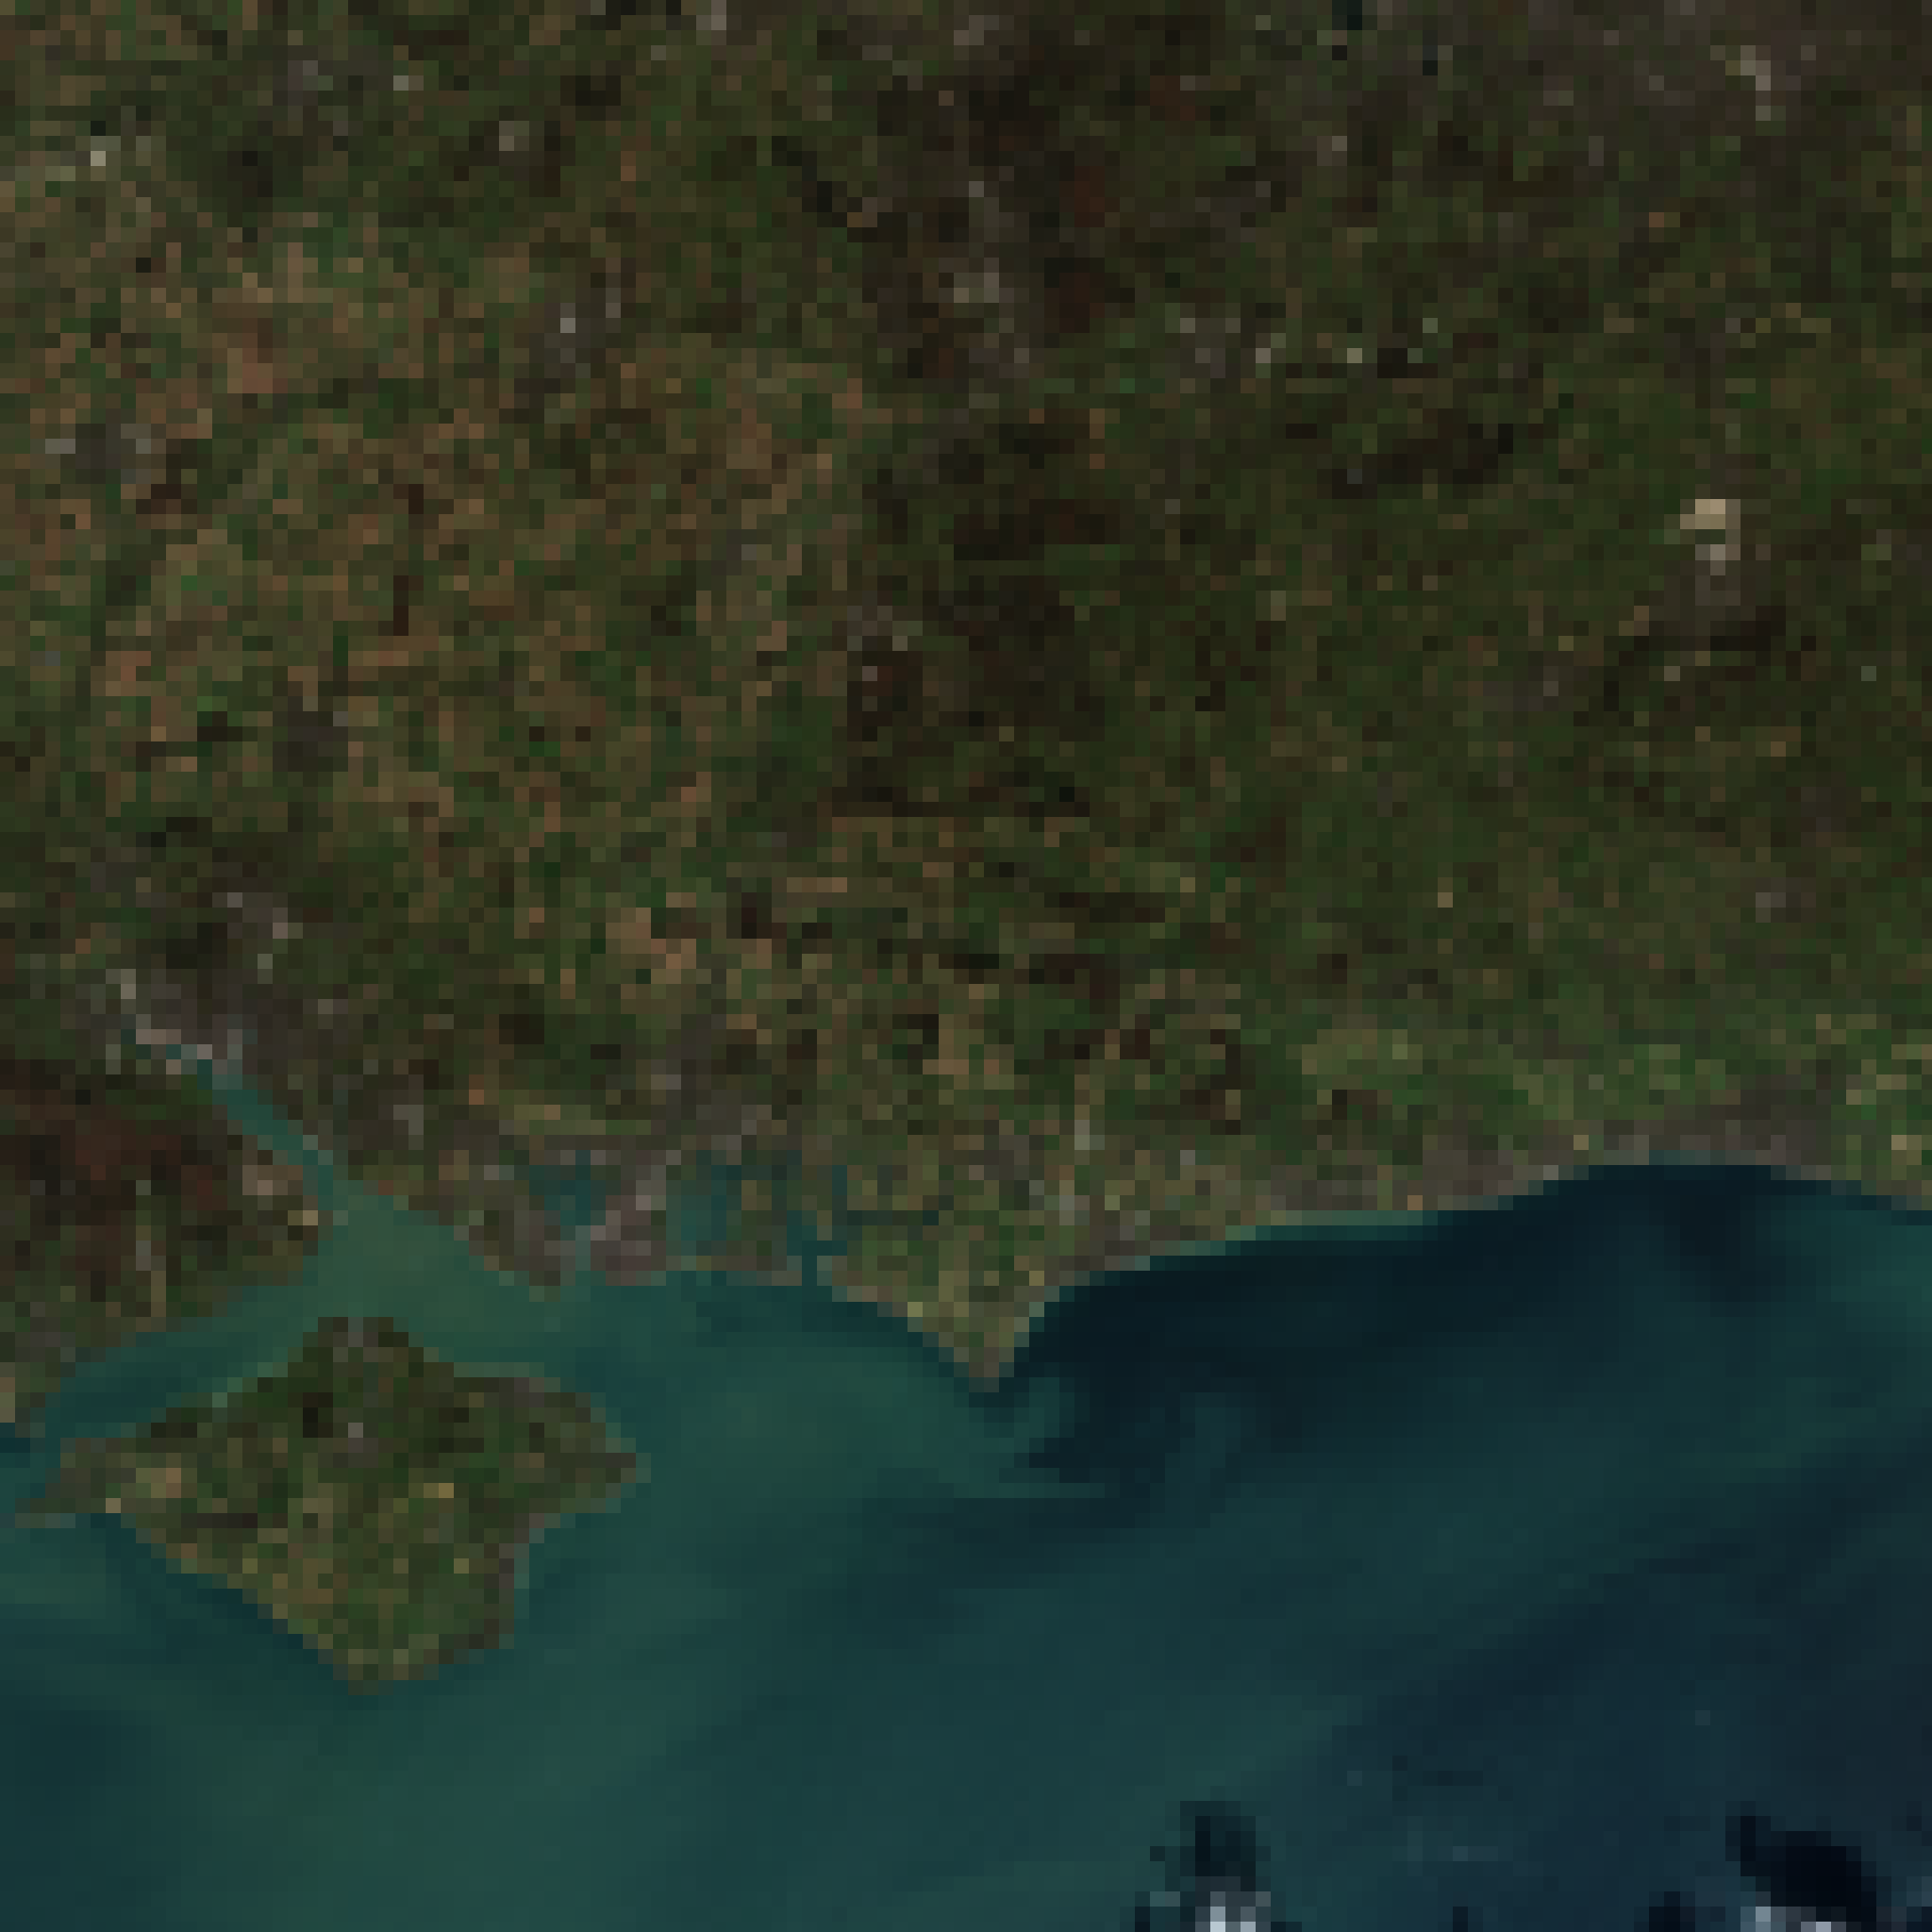

┌ Warning: Output swatches are reduced due to the large size (10980×10980).
│ Load the ImageShow package for large images.
└ @ Colors C:\Users\andre\.julia\packages\Colors\yDxFN\src\display.jl:159


In [5]:
AG.imread(RGB)

Use ImageShow to imporve the display (for large images) <br>

`using Pkg`

`Pkg.add(ImageShow)`

if not already installed

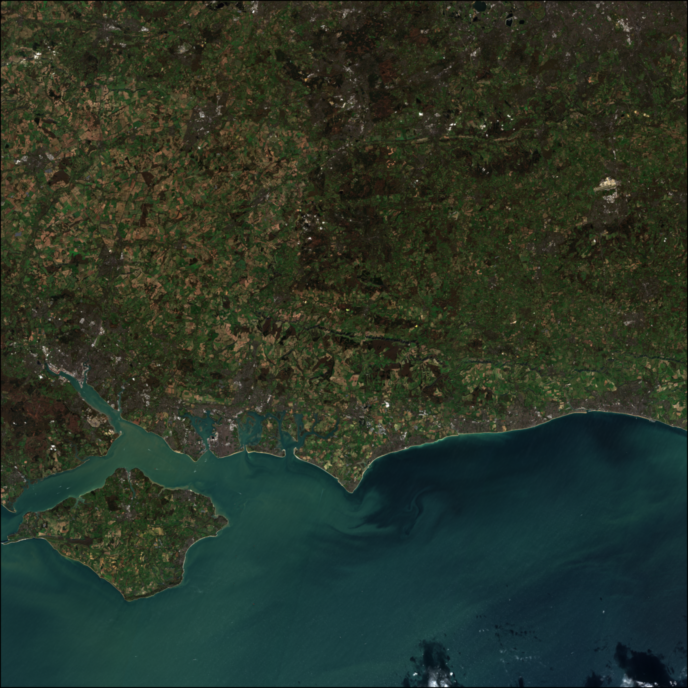

In [6]:
using ImageShow

AG.imread(RGB)

Now working with the arrays is common practice with Satellite data GeoArrays sits on ArcGDAL for this see https://juliahub.com/ui/Packages/GeoArrays/JRUtS/0.6.0

In [7]:
using GeoArrays

Read band4

In [8]:
ga = GeoArrays.read(band4)

10980x10980x1 Array{UInt16, 3} with AffineMap([10.0 0.0; 0.0 -10.0], [600000.0, 5.7e6]) and CRS PROJCS["WGS 84 / UTM zone 30N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32630"]]

Get the projection (very similar to rasterio - if you know that)

In [9]:
ga.crs

GeoFormatTypes.WellKnownText{GeoFormatTypes.CRS, String}(GeoFormatTypes.CRS(), "PROJCS[\"WGS 84 / UTM zone 30N\",GEOGCS[\"WGS 84\",DATUM[\"WGS_1984\",SPHEROID[\"WGS 84\",6378137,298.257223563,AUTHORITY[\"EPSG\",\"7030\"]],AUTHORITY[\"EPSG\",\"6326\"]],PRIMEM[\"Greenwich\",0,AUTHORITY[\"EPSG\",\"8901\"]],UNIT[\"degree\",0.0174532925199433,AUTHORITY[\"EPSG\",\"9122\"]],AUTHORITY[\"EPSG\",\"4326\"]],PROJECTION[\"Transverse_Mercator\"],PARAMETER[\"latitude_of_origin\",0],PARAMETER[\"central_meridian\",-3],PARAMETER[\"scale_factor\",0.9996],PARAMETER[\"false_easting\",500000],PARAMETER[\"false_northing\",0],UNIT[\"metre\",1,AUTHORITY[\"EPSG\",\"9001\"]],AXIS[\"Easting\",EAST],AXIS[\"Northing\",NORTH],AUTHORITY[\"EPSG\",\"32630\"]]")

Calculate NDVI. first read in the bands as GeoArrays and then perform the calculation

In [10]:
b_nir = GeoArrays.read(band8)
b_r = GeoArrays.read(band4)
ndvi = (b_nir - b_r) ./ (b_nir + b_r);

Get the array details (shape and type equivalent in Python)

In [11]:
print(size(ndvi))
print()
print(typeof(ndvi))

(10980, 10980, 1)Array{Float64, 3}

Only for plotting in Julia we need to drop the 3rd dimension. This used to be Squeeze but in this version dropdims is recommended

In [12]:
ndvi_2d = dropdims(ndvi; dims=3)
print(size(ndvi_2d))

(10980, 10980)

Plot it up, we have to switch the axis in Julia arrays it seems. If unsure comment out the second line below. Using Images for plotting

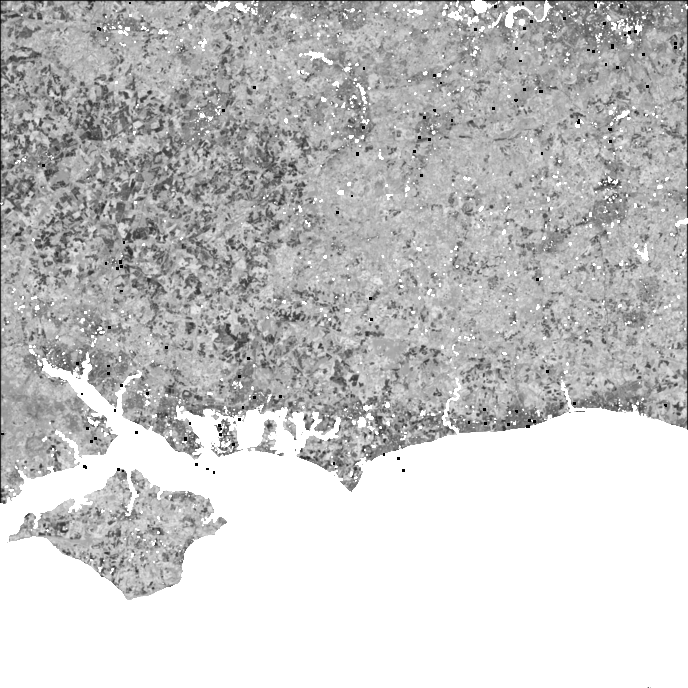

In [13]:
using Images
band_array_adjust = permutedims(ndvi_2d, (2,1)) # to switch axis
Gray.(band_array_adjust)

Convert the array previously created back to a GeoArray, format here is GeoArray(Array, Affine transform, coords sys)

In [14]:
ga = GeoArray(ndvi_2d, b_nir.f, b_nir.crs)

10980x10980x1 Array{Float64, 3} with AffineMap([10.0 0.0; 0.0 -10.0], [600000.0, 5.7e6]) and CRS PROJCS["WGS 84 / UTM zone 30N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32630"]]

write it out as a new geotiff

In [15]:
GeoArrays.write!("ndvi.tif", ga)

"ndvi.tif"